In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import math
import matplotlib.pyplot as plt 
import os 
import pydicom

data_path = "D:\\Kaggle\\PulmonaryFibrosisProgression"
data_set = pd.read_csv(data_path + "\\train.csv")
grp = data_set.Patient.unique()
print("Number of patient:", len(grp))


Number of patient: 176


In [4]:
def load_scan(path):
    slices = [pydicom.dcmread(path + "\\" + s) for s in os.listdir(path)]
    slices = [s for s in slices if "SliceLocation" in s]
    slices.sort(key = lambda x: int(x.InstanceNumber))
    # try:
    #     slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    # except:
    #     slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)

    # for s in slices:
    #     s.SliceThickness = slice_thickness

    return slices

train_files = os.listdir(data_path + "\\train\\")            ##Folder path for dicom files
i=0
patient_dicom = []

for f in test_files:
    patient_dicom.append(load_scan(data_path + "\\train\\" + f))
    i+=1
    print("\rCompleted: %d/%d"%(i,len(test_files)), end="\r")

5/5

<AxesSubplot:xlabel='PatientID', ylabel='Slices'>

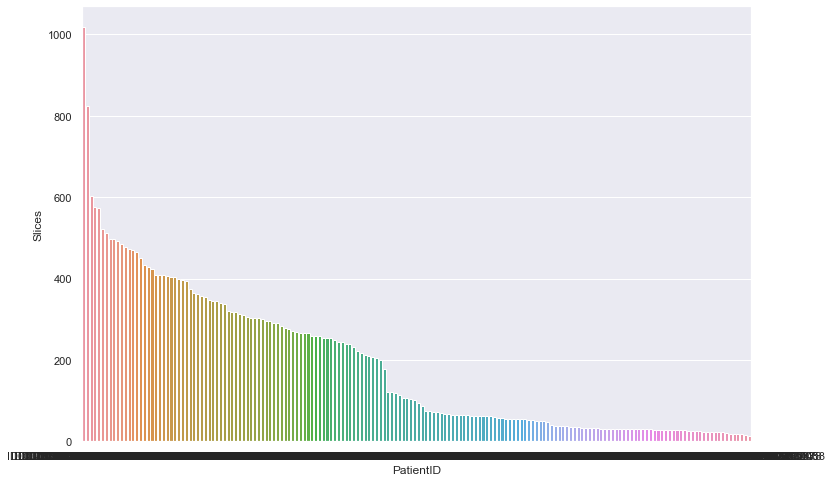

In [4]:
data_list= []

for f in grp:
    filenm = data_path + "\\train\\" + f 

    dict_t = {}
    dict_t.update({"PatientID": f, "Slices": len(os.listdir(filenm)) })
    data_list.append(dict_t)

data_df = pd.DataFrame(data_list)
data_df.sort_values(by = ["Slices"], ascending = False)



sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x="PatientID", y="Slices", data = data_df.sort_values(by = ["Slices"], ascending = False))


In [5]:
def get_pixel_scan(ct_scan):
    img = np.stack([s.pixel_array for s in ct_scan])
    img = img.astype(np.int16)
    img[img == -2000] = 0
    return np.array(img, dtype=np.int16)

output_path = data_path + "\\scanOP\\"


#Loop to convert all dicom to scans 
# i = 0
# for data in patient_dicom:
#     try:
#         scan = get_pixel_scan(data)
#         np.save(output_path + "scanImage_%s.npy"% (data[0].PatientID), scan)
#         i += 1
#         print("\rConverted scan and saved %d/%d" % (i,len(patient_dicom)), end="\r")
#     except:
#         pass



Patient ID: ID00012637202177665765362
Total slices available: 49


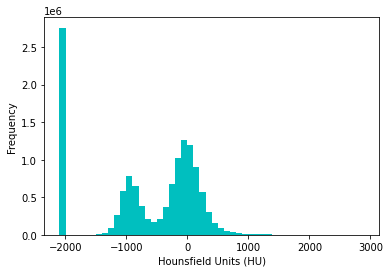

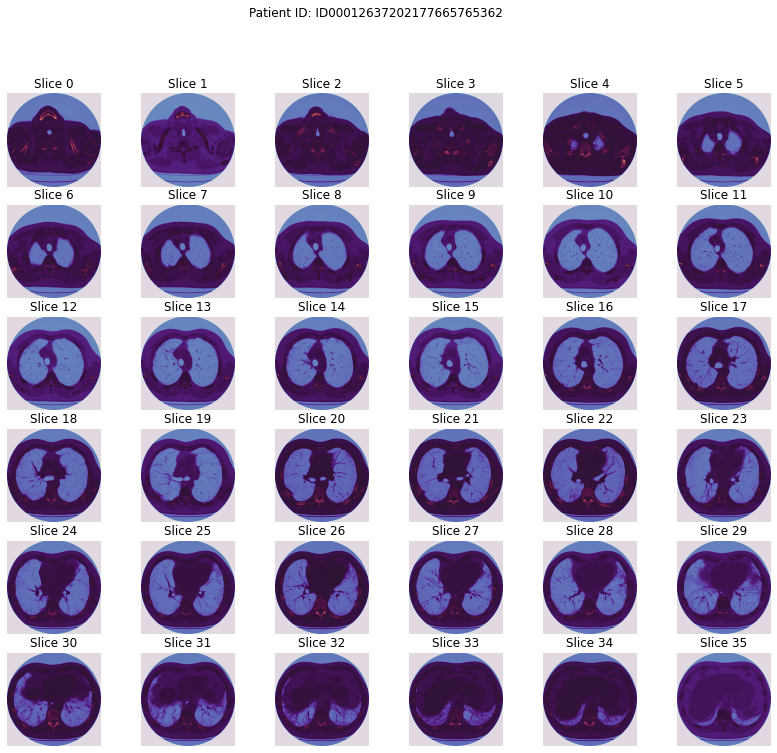

In [70]:
output_path = data_path + "\\scanOP\\"

patient_select = grp[4]
scan_retrieve = output_path + "\\scanImage_%s.npy"% (patient_select)

# scan = get_pixel_scan(patient_dicom[1])                     #    <<<----- SET WHICH DICOM TO DISPLAY
scan = np.load(scan_retrieve).astype(np.float64)


def scan_slice_spread(stack, rows=6, cols=6):

    plt.hist(scan.flatten(), bins=50, color='c')
    plt.xlabel("Hounsfield Units (HU)")
    plt.ylabel("Frequency")
    
    fig, ax = plt.subplots(rows,cols,figsize = [14,12])

    #set slice gap
    resolution = len(stack)
    grid_size = rows*cols
    
    if(resolution > grid_size):
        slices = int(resolution / grid_size)
    else: slices = 1

    ind = 0

    fig.suptitle("Patient ID: %s" % (patient_select), fontsize=12)
    
    print("Patient ID: %s" % (patient_select))
    print("Total slices available: %d" % (resolution))

    for i in range(grid_size) if (resolution > grid_size)  else range(resolution):
        
        ax[math.floor(i/rows), int(i%cols)].set_title('Slice %d' % (ind))
        ax[math.floor(i/rows), int(i%cols)].imshow(stack[ind], cmap="twilight")
        ax[math.floor(i/rows), int(i%cols)].axis('off')
        ind = ind + slices
    plt.show()
    

#Retrieve direct scan for one user
scan_slice_spread(scan)